In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)


In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date


('2017-08-23')

Text(0.5, 1.0, 'Precipitation by Date')

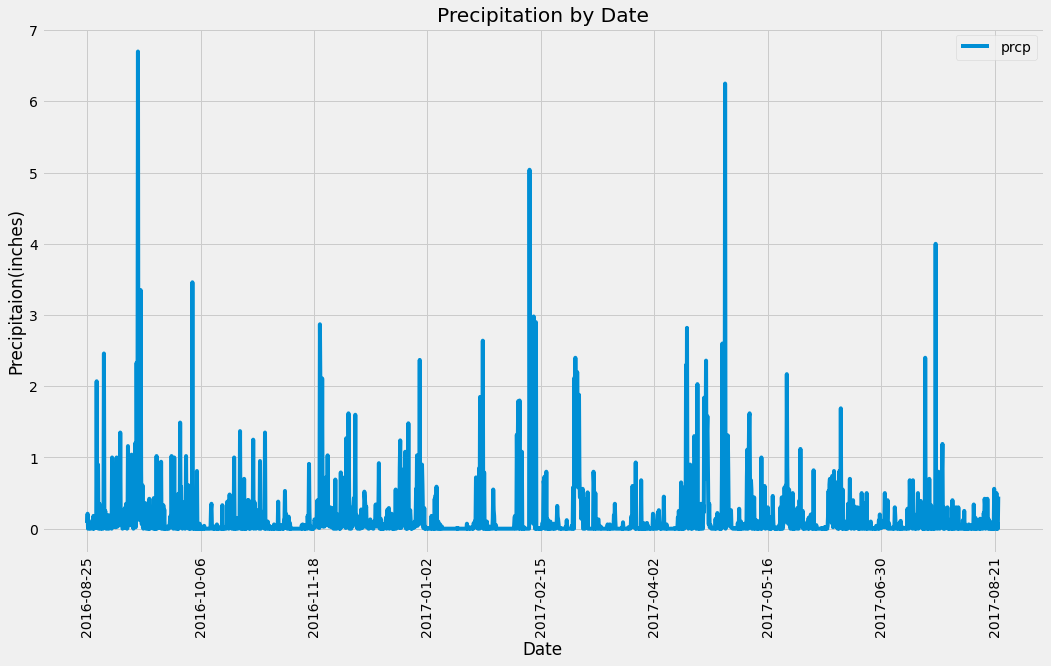

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_prior = dt.date(2017,8,23) - dt.timedelta(weeks = 52)
year_prior

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date > year_prior).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results)

df = df.set_index(['date'])

df = df.dropna(axis = 0, how = 'any')


# Sort the dataframe by date
df = df.sort_values(["date"],ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
graph = df.plot(figsize=(16,9), rot = 90, xlabel = "Date", ylabel = "Precipitaion(inches)")
plt.title("Precipitation by Date")





In [70]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()


,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [84]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct(measurement.station).count()

9

In [92]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(measurement.station,func.min(measurement.prcp),func.max(measurement.prcp),func.avg(measurement.prcp)).filter(measurement.station == 'USC00519281').all()

[('USC00519281', 0.0, 9.64, 0.2123520923520915)]

Text(0.5, 1.0, 'Tempature @ Station: USC00519281')

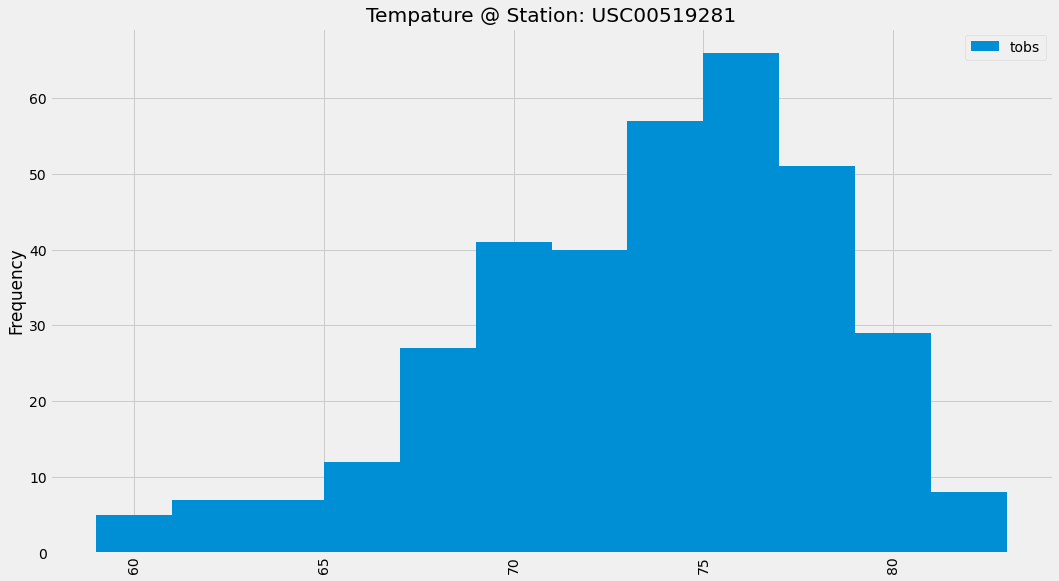

In [98]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_prior_active= dt.date(2017,8,23) - dt.timedelta(weeks = 52)
year_prior_active

results_active = session.query(measurement.tobs).filter(measurement.date > year_prior_active).filter(measurement.station == 'USC00519281').all()

df_active = pd.DataFrame(results_active)

df_active = df_active.dropna(axis = 0, how = 'any')

graph_active = df_active.plot(kind = 'hist', figsize=(16,9), rot = 90, xlabel = "Temp (F)", ylabel = "Frequency", bins=12)
plt.title("Tempature @ Station: USC00519281")

# Close session

In [99]:
# Close Session
session.close()